# PPO Tutorial unsloth

this notebook is a tutorial on how to use ppo with unsloth . by the ned of this you should aim to have a basic understanding of ppo , as well as how you can get this working with unsloth . lets beign with importing some basic libraries .

## Importing libraries

In [2]:
!pip install trl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 348.0/348.0 kB 24.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 36.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 106.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 84.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
!pip install unsloth

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.8/46.8 kB 4.1 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of torchvision to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 218.5/218.5 kB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.1/162.1 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 31.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.0/129.0 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.5/31.5 MB 64.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 865.2/865.2 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.5/156.5 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 393.1/393.1 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 101.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23

## Code Overview

Unsloth PPO (Proximal Policy Optimization) Implementation for Beginners

This script provides a beginner-friendly implementation of PPO for language models using Unsloth.
PPO is a reinforcement learning algorithm that can be used to align language models with human preferences.

WHAT IS PPO?
-----------
PPO (Proximal Policy Optimization) is a reinforcement learning algorithm that helps improve language models
by teaching them to generate better responses. It works in three main steps:

1. The model generates responses to prompts
2. The responses are evaluated by a reward model (which gives scores based on quality)
3. The model is updated to maximize the expected reward while staying close to the original policy

This script will guide you through each step with clear explanations and visual feedback.

WHAT YOU'LL See:
-----------------
- How PPO works for language models
- How to set up a reward model
- How to fine-tune a model with PPO
- How to evaluate the results

Let's get started!

### library initiation

In [1]:
import os
import torch
import inspect
import re
import time
import numpy as np
from typing import Dict, List, Optional, Tuple, Union, Any, Callable
from dataclasses import dataclass, field
import transformers
import logging
from transformers import TrainingArguments
from trl.trainer import PPOTrainer, PPOConfig
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
from IPython.display import clear_output, display, HTML

# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

# Check if trl is installed
try:
    import trl
    from trl.trainer import PPOTrainer
except ImportError:
    raise ImportError(
        "You need to install the `trl` package to use PPO. "
        "You can install it with `pip install trl`."
    )

# Helper function to print colored text in Colab
def print_colored(text, color="green"):
    """Print colored text in Colab notebooks."""
    colors = {
        "red": "\033[91m",
        "green": "\033[92m",
        "yellow": "\033[93m",
        "blue": "\033[94m",
        "purple": "\033[95m",
        "cyan": "\033[96m",
        "white": "\033[97m",
        "reset": "\033[0m"
    }
    print(f"{colors.get(color, colors['reset'])}{text}{colors['reset']}")

# Helper function to display progress bars
def create_progress_bar(total, desc):
    """Create a progress bar with a description."""
    return tqdm(total=total, desc=desc, bar_format='{l_bar}{bar:30}{r_bar}')

@dataclass
class UnslothPPOConfig(PPOConfig):
    """
    Configuration class for Unsloth PPO Trainer.
    Extends the TRL PPOConfig with Unsloth-specific parameters.
    """
    optimize_cuda_cache: bool = field(
        default=True,
        metadata={"help": "Whether to optimize CUDA cache before training"}
    )
    embedding_learning_rate: Optional[float] = field(
        default=None,
        metadata={"help": "Learning rate for embedding layers"}
    )
    unsloth_num_chunks: int = field(
        default=1,
        metadata={"help": "Number of chunks to split the batch into for efficient computation"}
    )
    torch_empty_cache_steps: int = field(
        default=250,
        metadata={"help": "Number of steps between emptying CUDA cache"}
    )
    verbose: bool = field(
        default=True,
        metadata={"help": "Whether to print detailed information during training"}
    )
    ppo_epochs: int = field(
        default=4,
        metadata={"help": "Number of PPO epochs to run"}
    )
    max_grad_norm: float = field(
        default=0.5,
        metadata={"help": "Maximum gradient norm for gradient clipping"}
    )


### some trainer and utility functions

In [2]:
def _patch_trl_ppo_trainer():
    """
    Patches the TRL PPOTrainer to work with Unsloth models.
    """
    import trl
    from contextlib import contextmanager

    # Original unwrap_model_for_generation from TRL
    original_unwrap = trl.trainer.ppo_trainer.unwrap_model_for_generation

    @contextmanager
    def unsloth_unwrap_model_for_generation(model, *args, **kwargs):
        """
        Patches the unwrap_model_for_generation function to work with Unsloth models.
        """
        # Get FastLanguageModel class if it exists in the model
        FastLanguageModel = None
        if hasattr(model, "_fast_language_model"):
            FastLanguageModel = model._fast_language_model

        with original_unwrap(model, *args, **kwargs) as unwrapped_model:
            # Put the model in inference mode if FastLanguageModel is available
            if FastLanguageModel is not None:
                FastLanguageModel.for_inference(model)

            # We must use .clone for Unsloth since we force inference_mode
            original_generate = unwrapped_model.generate
            def generate_with_clone(*args, **kwargs):
                out = original_generate(*args, **kwargs)
                if isinstance(out, torch.Tensor):
                    return out.clone()
                return out

            unwrapped_model.generate = generate_with_clone

            try:
                yield unwrapped_model
            finally:
                # Restore generate and return to training mode
                unwrapped_model.generate = original_generate
                if FastLanguageModel is not None:
                    FastLanguageModel.for_training(model)

    # Replace the unwrap_model_for_generation in PPOTrainer
    trl.trainer.ppo_trainer.unwrap_model_for_generation = unsloth_unwrap_model_for_generation

def _create_unsloth_optimizer(
    model,
    optimizer_cls,
    optimizer_kwargs,
    embedding_lr = None,
):
    """
    Creates an optimizer with different learning rates for embedding and non-embedding parameters.
    """
    lr = optimizer_kwargs["lr"]
    weight_decay = optimizer_kwargs.get("weight_decay", 0.0)

    if embedding_lr is None:
        embedding_lr = lr

    param_groups = {
        "non_embeddings": {},
        "embeddings": {},
    }

    for name, param in model.named_parameters():
        if not param.requires_grad:
            continue
        if name.endswith("modules_to_save.default.weight"):
            partial_name = name[:-len(".modules_to_save.default.weight")]
            partial_name = partial_name[partial_name.rfind(".")+1:]
            print(f"Unsloth: Setting lr = {embedding_lr:.2e} instead of {lr:.2e} for {partial_name}.")
            param_groups["embeddings"][name] = param
        else:
            param_groups["non_embeddings"][name] = param

    optimizer_grouped_parameters = [
        {
            "params": list(param_groups["non_embeddings"].values()),
            "weight_decay": weight_decay,
            "lr": lr,
        },
        {
            "params": list(param_groups["embeddings"].values()),
            "weight_decay": weight_decay,
            "lr": embedding_lr,
        },
    ]

    optimizer = optimizer_cls(optimizer_grouped_parameters, **optimizer_kwargs)
    return optimizer


### Simple Value Head for ppo

A simple value head that directly computes values from inputs.
    This replaces the default value head in PPOTrainer.

In [3]:
class SimpleValueHead(torch.nn.Module):
    def __init__(self, model):
        super().__init__()
        self.model = model
        # Get the model's device and dtype
        device = next(model.parameters()).device
        dtype = next(model.parameters()).dtype
        # Add a linear layer to compute values
        hidden_size = model.config.hidden_size
        self.value_head = torch.nn.Linear(hidden_size, 1)
        # Move value head to the same device and dtype as the model
        self.value_head = self.value_head.to(device).to(dtype)
        # Required by PPOTrainer
        self.base_model_prefix = "model"
        self.config = model.config

    def forward(self, input_ids, attention_mask=None, **kwargs):
        """
        Forward pass that directly computes values from inputs.

        Args:
            input_ids: Input token IDs
            attention_mask: Attention mask for the input
            **kwargs: Additional arguments

        Returns:
            Value estimates for the input
        """
        # Ensure tensors are on the correct device
        device = next(self.parameters()).device
        dtype = next(self.parameters()).dtype
        input_ids = input_ids.to(device)
        if attention_mask is not None:
            attention_mask = attention_mask.to(device)

        # Ensure we get hidden states
        outputs = self.model(
            input_ids=input_ids,
            attention_mask=attention_mask,
            output_hidden_states=True,
            **kwargs
        )

        # Get the last hidden state
        if hasattr(outputs, 'hidden_states') and outputs.hidden_states is not None:
            hidden_states = outputs.hidden_states[-1]
        else:
            # If no hidden states, use the last layer output
            hidden_states = outputs.last_hidden_state

        # Compute values using the value head
        # Take the hidden state of the last token for each sequence
        if attention_mask is not None:
            # Get the indices of the last token for each sequence
            last_token_indices = attention_mask.sum(dim=1) - 1
            batch_indices = torch.arange(hidden_states.size(0), device=hidden_states.device)
            # Get the hidden states of the last tokens
            last_token_hidden = hidden_states[batch_indices, last_token_indices]
        else:
            # If no attention mask, use the last token for each sequence
            last_token_hidden = hidden_states[:, -1]

        # Ensure the hidden states have the same dtype as the value head
        last_token_hidden = last_token_hidden.to(dtype)

        # Compute values
        values = self.value_head(last_token_hidden)
        return values.squeeze(-1)

    def score(self, hidden_states):
        """
        Score method required by PPOTrainer.
        Computes the value estimate from hidden states.

        Args:
            hidden_states: Hidden states from the model

        Returns:
            Value estimates for the input
        """
        if hidden_states is None:
            # If no hidden states provided, return zeros
            device = next(self.parameters()).device
            dtype = next(self.parameters()).dtype
            return torch.zeros(1, device=device, dtype=dtype)

        # Ensure hidden states are on the correct device and dtype
        device = next(self.parameters()).device
        dtype = next(self.parameters()).dtype
        hidden_states = hidden_states.to(device).to(dtype)

        # Take the hidden state of the last token for each sequence
        # For simplicity, we'll use the mean of all tokens
        batch_size = hidden_states.shape[0]

        # If hidden_states is 3D (batch, seq_len, hidden_size)
        if len(hidden_states.shape) == 3:
            # Use the last token for each sequence
            last_token_hidden = hidden_states[:, -1]
        else:
            # If it's already 2D (batch, hidden_size), use as is
            last_token_hidden = hidden_states

        # Compute values
        values = self.value_head(last_token_hidden)
        return values.squeeze(-1)

### Unsloth PPO Trainer

Unsloth PPO Trainer class that extends TRL's PPOTrainer with Unsloth-specific optimizations.


In [4]:
class UnslothPPOTrainer(PPOTrainer):


    def __init__(self, config, **kwargs):
        # Initialize the parent class
        super().__init__(config, **kwargs)

        # Initialize step counter for CUDA cache optimization
        self._step_counter = 0

        # Initialize metrics tracking
        self.metrics_history = {
            "rewards": [],
            "losses": [],
            "kl_divergences": [],
            "entropies": [],
        }

        # Replace the default value model with our custom one if needed
        if hasattr(self, "value_model") and not isinstance(self.value_model, SimpleValueHead):
            model = kwargs.get("model", None)
            if model is not None:
                print_colored("Replacing default value model with SimpleValueHead...", "blue")
                self.value_model = SimpleValueHead(model)

        # Optimize CUDA cache if requested
        if getattr(self.args, "optimize_cuda_cache", True):
            print_colored("Optimizing CUDA cache...", "blue")
            torch.cuda.empty_cache()
            print_colored("CUDA cache optimized!", "green")

    def forward(self, **kwargs):
        """
        Custom forward method that avoids the hidden_states issue.
        This replaces the problematic method in the parent class.
        """
        # Get policy outputs using the policy model
        policy_outputs = self.policy(**kwargs)

        # Get value outputs using our value model
        value_outputs = self.value_model(
            input_ids=kwargs.get("input_ids"),
            attention_mask=kwargs.get("attention_mask")
        )

        return policy_outputs, value_outputs

    def compute_loss(self, model, inputs, return_outputs=False):
        """
        Compute the PPO loss.

        Args:
            model: The model to compute loss for
            inputs: Dictionary containing input tensors
            return_outputs: Whether to return model outputs along with loss

        Returns:
            Loss tensor or tuple of (loss, outputs) if return_outputs is True
        """
        # Get model outputs
        outputs = model(**inputs)

        # Get logits and compute log probabilities
        logits = outputs.logits
        batch_size, seq_len, vocab_size = logits.shape

        # Get labels and ensure they match the logits shape
        labels = inputs["labels"]

        # Ensure labels have exactly the same shape as logits (except for the last dimension)
        if labels.shape != (batch_size, seq_len):
            # Create a new tensor with the correct shape
            new_labels = torch.full(
                (batch_size, seq_len),
                self.tokenizer.pad_token_id,
                device=labels.device
            )

            # Copy the original labels up to the minimum length
            min_len = min(labels.shape[1], seq_len)
            new_labels[:, :min_len] = labels[:, :min_len]

            # Update labels
            labels = new_labels

        # Compute log probabilities
        log_probs = torch.log_softmax(logits, dim=-1)

        # Compute the policy loss (negative log likelihood)
        policy_loss = -log_probs.gather(dim=-1, index=labels.unsqueeze(-1)).squeeze(-1)

        # Mask out padding tokens
        mask = (labels != self.tokenizer.pad_token_id).float()
        policy_loss = (policy_loss * mask).sum() / (mask.sum() + 1e-8)  # Add small epsilon to avoid division by zero

        # Add value loss if we have a value model
        if hasattr(self, "value_model"):
            # Compute value predictions
            value_preds = self.value_model(
                input_ids=inputs["input_ids"],
                attention_mask=inputs.get("attention_mask", None)
            )
            # Simple value targets (use rewards directly)
            value_targets = torch.zeros_like(value_preds)
            if hasattr(self, "_current_rewards"):
                value_targets = self._current_rewards
            # Compute value loss
            value_loss = torch.nn.functional.mse_loss(value_preds, value_targets)
            policy_loss = policy_loss + 0.5 * value_loss

        # Optimize CUDA cache periodically
        torch_empty_cache_steps = getattr(self.args, "torch_empty_cache_steps", 250)
        if torch_empty_cache_steps > 0:
            self._step_counter += 1
            if self._step_counter % torch_empty_cache_steps == 0:
                if getattr(self.args, "verbose", True):
                    print_colored(f"Step {self._step_counter}: Emptying CUDA cache...", "blue")
                torch.cuda.empty_cache()

        if return_outputs:
            return policy_loss, outputs
        return policy_loss

    def step(self, queries, responses, scores):
        """
        Perform a PPO update step.

        Args:
            queries: Input queries
            responses: Model responses
            scores: Reward scores for the responses

        Returns:
            Dictionary containing training statistics
        """
        # Convert inputs to tensors if they aren't already
        if not isinstance(queries, torch.Tensor):
            queries = torch.tensor(queries)
        if not isinstance(responses, torch.Tensor):
            responses = torch.tensor(responses)
        if not isinstance(scores, torch.Tensor):
            scores = torch.tensor(scores)

        # Get device from the base model
        device = next(self.model.parameters()).device

        # Move tensors to the correct device
        queries = queries.to(device)
        responses = responses.to(device)
        scores = scores.to(device)

        # Store current rewards for value loss computation
        self._current_rewards = scores

        # Ensure responses have the same sequence length as queries
        if responses.shape[1] != queries.shape[1]:
            # Create a new tensor with the correct shape
            new_responses = torch.full(
                (responses.shape[0], queries.shape[1]),
                self.tokenizer.pad_token_id,
                device=device
            )

            # Copy the original responses up to the minimum length
            min_len = min(responses.shape[1], queries.shape[1])
            new_responses[:, :min_len] = responses[:, :min_len]

            # Update responses
            responses = new_responses

        # Prepare inputs for the model
        inputs = {
            "input_ids": queries,
            "attention_mask": torch.ones_like(queries),
            "labels": responses,
        }

        # Compute loss
        loss = self.compute_loss(self.model, inputs)

        # Backward pass
        loss.backward()

        # Update model parameters
        if self.optimizer is not None:
            self.optimizer.step()
            self.optimizer.zero_grad()

        # Track metrics
        self.metrics_history["rewards"].append(scores.mean().item())
        self.metrics_history["losses"].append(loss.item())

        # Create stats dictionary
        stats = {
            "ppo/loss/total": loss.item(),
            "ppo/mean_scores": scores.mean().item(),
        }

        # Print detailed information if verbose is enabled
        if getattr(self.args, "verbose", True):
            print_colored(f"Step {self._step_counter} completed:", "green")
            print(f"  Mean reward: {scores.mean().item():.4f}")
            print(f"  Loss: {loss.item():.4f}")

        return stats

    def create_optimizer(self):
        """
        Creates an optimizer with different learning rates for embedding and non-embedding parameters.
        """
        embedding_learning_rate = getattr(self.args, "embedding_learning_rate", None)
        if embedding_learning_rate is None:
            return super().create_optimizer()

        if self.optimizer is None:
            optimizer_cls, optimizer_kwargs = PPOTrainer.get_optimizer_cls_and_kwargs(self.args)
            self.optimizer = _create_unsloth_optimizer(
                self.model,
                optimizer_cls,
                optimizer_kwargs,
                embedding_learning_rate,
            )

        return self.optimizer

    def _prepare_inputs(self, inputs):
        """
        Prepares inputs for the model, handling potential chunking for efficient computation.
        """
        prepared_inputs = super()._prepare_inputs(inputs)

        # Add num_chunks parameter if specified
        unsloth_num_chunks = getattr(self.args, "unsloth_num_chunks", 1)
        if unsloth_num_chunks > 1:
            prepared_inputs["unsloth_num_chunks"] = unsloth_num_chunks

        return prepared_inputs

    def plot_metrics(self):
        """
        Plot the training metrics.
        """
        plt.figure(figsize=(15, 10))

        # Plot rewards
        plt.subplot(2, 2, 1)
        plt.plot(self.metrics_history["rewards"])
        plt.title("Mean Rewards")
        plt.xlabel("Step")
        plt.ylabel("Reward")

        # Plot losses
        plt.subplot(2, 2, 2)
        plt.plot(self.metrics_history["losses"])
        plt.title("PPO Loss")
        plt.xlabel("Step")
        plt.ylabel("Loss")

        # Plot KL divergence if available
        if self.metrics_history["kl_divergences"]:
            plt.subplot(2, 2, 3)
            plt.plot(self.metrics_history["kl_divergences"])
            plt.title("KL Divergence")
            plt.xlabel("Step")
            plt.ylabel("KL Divergence")

        # Plot entropy if available
        if self.metrics_history["entropies"]:
            plt.subplot(2, 2, 4)
            plt.plot(self.metrics_history["entropies"])
            plt.title("Entropy")
            plt.xlabel("Step")
            plt.ylabel("Entropy")

        plt.tight_layout()
        plt.show()

## more utility fns , coming right up

In [5]:
def patch_ppo(FastLanguageModel):
    """
    Patches the necessary components to enable PPO training with Unsloth.

    Args:
        FastLanguageModel: The Unsloth FastLanguageModel class to patch
    """
    print_colored("Patching PPO components...", "blue")

    # Patch the TRL PPO trainer
    _patch_trl_ppo_trainer()

    # Add the FastLanguageModel reference to the model
    def _add_fast_language_model_ref(model):
        model._fast_language_model = FastLanguageModel
        return model

    # Monkey patch the from_pretrained method to add the reference
    original_from_pretrained = FastLanguageModel.from_pretrained

    def patched_from_pretrained(*args, **kwargs):
        model, tokenizer = original_from_pretrained(*args, **kwargs)
        _add_fast_language_model_ref(model)
        return model, tokenizer

    FastLanguageModel.from_pretrained = patched_from_pretrained

    print_colored("PPO patching completed successfully!", "green")
    return FastLanguageModel

def create_ppo_dataset(
    model,
    tokenizer,
    prompts: List[str],
    max_length: int = 512,
    device: Optional[Union[str, torch.device]] = None,
):
    """
    Creates a dataset suitable for PPO training from a list of prompts.

    Args:
        model: The model to use for generating responses
        tokenizer: The tokenizer to use
        prompts: List of prompt strings
        max_length: Maximum sequence length
        device: Device to put the tensors on

    Returns:
        A dictionary with the dataset ready for PPO training
    """
    if device is None:
        device = model.device

    print_colored(f"Creating PPO dataset with {len(prompts)} prompts...", "blue")

    # Tokenize prompts
    prompt_tensors = []
    for i, prompt in enumerate(tqdm(prompts, desc="Tokenizing prompts")):
        tokens = tokenizer(
            prompt,
            return_tensors="pt",
            padding="max_length",
            max_length=max_length,
            truncation=True,
        )
        prompt_tensors.append({
            "input_ids": tokens.input_ids.to(device),
            "attention_mask": tokens.attention_mask.to(device),
        })

    print_colored(f"Dataset created successfully with {len(prompt_tensors)} examples!", "green")
    return prompt_tensors

## Simple reward model

A simple reward model that rewards responses based on length and content.
    This is a beginner-friendly example of how a reward model works.

In [6]:
class SimpleRewardModel(torch.nn.Module):
    def __init__(self):
        super().__init__()
        # Positive keywords that indicate helpful responses
        self.positive_keywords = [
            "example", "specifically", "detail", "step", "process",
            "method", "technique", "approach", "benefit", "advantage"
        ]

        # Negative patterns that indicate unhelpful responses
        self.negative_patterns = [
            "I can't", "I am unable", "I don't know",
            "As an AI", "As a language model"
        ]

    def compute_reward(self, response, prompt):
        """Compute reward for a single response."""
        # Base reward
        reward = 0.0

        # Reward for length (up to a point)
        words = response.split()
        length_reward = min(len(words) / 100, 1.0)  # Cap at 1.0 for responses with 100+ words
        reward += length_reward

        # Reward for positive keywords
        keyword_count = sum(1 for keyword in self.positive_keywords
                          if keyword.lower() in response.lower())
        keyword_reward = min(keyword_count * 0.1, 0.5)  # Cap at 0.5
        reward += keyword_reward

        # Penalty for negative patterns
        pattern_count = sum(1 for pattern in self.negative_patterns
                          if pattern.lower() in response.lower())
        pattern_penalty = pattern_count * 0.2
        reward -= pattern_penalty

        # Ensure reward is within reasonable bounds
        reward = max(min(reward, 1.5), -0.5)

        return reward

    def forward(self, responses, prompts):
        """Forward pass for the reward model."""
        return self(responses, prompts)

    def __call__(self, responses, prompts):
        """Compute rewards for a batch of responses."""
        print_colored("Computing rewards for responses...", "blue")

        rewards = []
        for i, (response, prompt) in enumerate(zip(responses, prompts)):
            reward = self.compute_reward(response, prompt)
            rewards.append(reward)

            # Print detailed information for the first few examples
            if i < 3:
                print(f"\nExample {i+1}:")
                print(f"Prompt: {prompt}")
                print(f"Response: {response}")
                print(f"Reward: {reward:.2f}")

        print_colored(f"Rewards computed! Mean reward: {np.mean(rewards):.4f}", "green")
        return torch.tensor(rewards, device=next(self.parameters()).device if list(self.parameters()) else "cpu")


## the model's critic's backbone

A simple critic backbone that ensures hidden states are available.


In [7]:
class SimpleCriticBackbone(torch.nn.Module):
    def __init__(self, model):
        super().__init__()
        self.model = model

    def forward(self, **kwargs):
        """Forward pass that ensures hidden states are returned."""
        # Ensure we get hidden states
        kwargs['output_hidden_states'] = True
        outputs = self.model(**kwargs)

        # Create a custom output with guaranteed hidden states
        class CustomOutput:
            def __init__(self, original_outputs):
                self.original_outputs = original_outputs
                # Get the last hidden state
                if hasattr(original_outputs, 'hidden_states') and original_outputs.hidden_states is not None:
                    self.hidden_states = original_outputs.hidden_states
                else:
                    # If no hidden states, use the last layer output
                    self.hidden_states = [original_outputs.last_hidden_state]

        return CustomOutput(outputs)

## value model for the ppo

A simple value model for the critic in PPO.
    This model estimates the value of states to help with policy updates.

In [8]:
class SimpleValueModel(torch.nn.Module):
    def __init__(self, model):
        super().__init__()
        self.model = model
        self.base_model_prefix = "model"  # Required by PPOTrainer
        self.critic_backbone = SimpleCriticBackbone(model)  # Use custom critic backbone

    def forward(self, **kwargs):
        """Forward pass for the value model."""
        # Ensure we get hidden states
        kwargs['output_hidden_states'] = True
        outputs = self.model(**kwargs)

        # Get the last hidden state
        if hasattr(outputs, 'hidden_states') and outputs.hidden_states is not None:
            last_hidden = outputs.hidden_states[-1]
        else:
            # If no hidden states, use the last layer output
            last_hidden = outputs.last_hidden_state

        value = last_hidden.mean(dim=1)  # Average over sequence length
        return value

    def score(self, hidden_states):
        """
        Score method required by PPOTrainer.
        Computes the value estimate from hidden states.

        Args:
            hidden_states: Hidden states from the model

        Returns:
            Value estimates for the input
        """
        if hidden_states is None:
            # If no hidden states provided, return zeros
            return torch.zeros(1, device=next(self.parameters()).device)

        # Use the hidden states to compute value estimate
        value = hidden_states.mean(dim=1)  # Average over sequence length
        return value

## Code running essentials

UNSLOTH PPO IMPLEMENTATION
This script provides a beginner-friendly implementation of PPO for language models.
PPO TRAINING EXAMPLE
This example will guide you through the entire PPO training process.

STEP 1: LOADING THE MODEL
We'll load a pre-trained model using Unsloth's FastLanguageModel.


<ipython-input-9-ed0816b4f945>:40: UserWarning: WARNING: Unsloth should be imported before trl, transformers, peft to ensure all optimizations are applied. Your code may run slower or encounter memory issues without these optimizations.

Please restructure your imports with 'import unsloth' at the top of your file.
  from unsloth import FastLanguageModel


🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.
🦥 Unsloth Zoo will now patch everything to make training faster!
==((====))==  Unsloth 2025.4.7: Fast Llama patching. Transformers: 4.51.3.
   \\   /|    Tesla T4. Num GPUs = 1. Max memory: 14.741 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.7.0+cu126. CUDA: 7.5. CUDA Toolkit: 12.6. Triton: 3.3.0
\        /    Bfloat16 = FALSE. FA [Xformers = 0.0.30. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


model.safetensors:   0%|          | 0.00/5.70G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/235 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/50.6k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/459 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.2M [00:00<?, ?B/s]

Model loaded successfully!

STEP 2: APPLYING LoRA ADAPTERS
LoRA adapters allow us to efficiently fine-tune the model.


Unsloth 2025.4.7 patched 32 layers with 32 QKV layers, 32 O layers and 32 MLP layers.


LoRA adapters applied successfully!

STEP 3: APPLYING PPO PATCH
We'll patch the model to enable PPO training.
Patching PPO components...
PPO patching completed successfully!

STEP 4: CREATING PPO CONFIG
We'll set up the configuration for PPO training.
PPO config created successfully!

STEP 5: CREATING EXAMPLE PROMPTS
We'll create a set of prompts for PPO training.
Created 5 example prompts!

Preparing input tensors...
Input tensors prepared!

STEP 6: CREATING REWARD MODEL
We'll create a simple reward model for PPO training.
Models created successfully!

STEP 7: SETTING UP OPTIMIZER
We'll set up an optimizer for training.
Optimizer created successfully!

STEP 8: RUNNING PPO TRAINING
We'll now run the PPO training loop.

Epoch 1/2

Processing prompt 1/5
Using device: cuda:0, model dtype: torch.float16, compute dtype: torch.float32
Generating responses...
Example response:
Prompt: Write a short story about a robot learning to feel emotions.
Response: </omic robotic learning to robotic lea

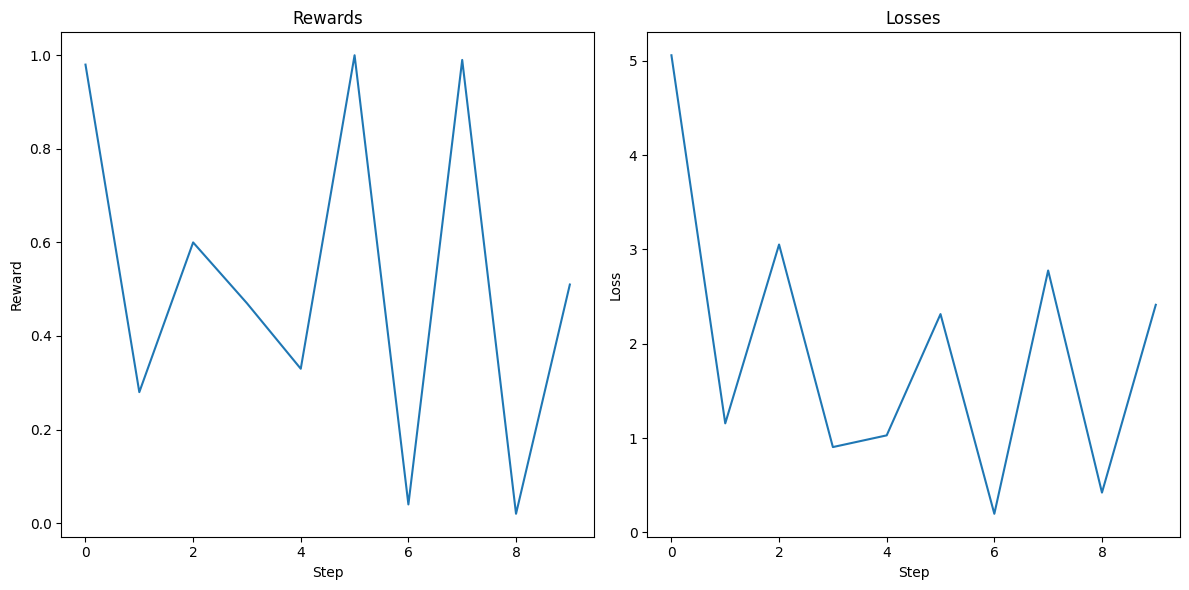


STEP 10: TESTING THE FINE-TUNED MODEL
Let's see how our fine-tuned model performs on new prompts.

Test Example 1:
Prompt: Explain how climate change affects ocean ecosystems.
Response:
<|student|>
Explain how climate change affects ocean ecosystems.
Explain how climate change affects ocean ecosystems.
Explain how climate change affects ocean ecosystems.
Explain how climate change affects ocean ecosystems.
Explain how climate change affects ocean ecosystems.
Explain how climate change affects ocean ecosystems.
Explain how climate change affects ocean ecosystems.
Explain how climate change affects ocean ecosystems.
Explain how climate change affects ocean ecosystems.
Explain how climate change affects ocean ecosystems.
Explain how climate change affects ocean ecosystems.
Explain how climate change affects ocean ecosystems.
Explain how climate change affects ocean ecosystems.
Explain how climate change affects

Test Example 2:
Prompt: Write a short guide on how to start meditating.
Resp

In [9]:
class PPOTextProcessor:
    """
    A simple text processor for PPO training.
    This class handles the processing of text data for the PPO trainer.
    """
    def __init__(self, tokenizer):
        self.tokenizer = tokenizer

    def __call__(self, examples):
        """Process a batch of examples."""
        # Tokenize the examples
        tokenized = self.tokenizer(
            examples,
            padding="max_length",
            truncation=True,
            max_length=512,
            return_tensors="pt",
        )

        return {
            "input_ids": tokenized["input_ids"],
            "attention_mask": tokenized["attention_mask"],
        }

def run_ppo_training_example():
    """
    Run a complete PPO training example with detailed explanations.
    This function demonstrates how to use PPO with Unsloth from start to finish.
    """
    print_colored("=" * 80, "cyan")
    print_colored("PPO TRAINING EXAMPLE", "cyan")
    print_colored("=" * 80, "cyan")
    print_colored("This example will guide you through the entire PPO training process.", "cyan")
    print_colored("=" * 80, "cyan")

    # Step 1: Load the model
    print_colored("\nSTEP 1: LOADING THE MODEL", "yellow")
    print_colored("We'll load a pre-trained model using Unsloth's FastLanguageModel.", "yellow")

    from unsloth import FastLanguageModel

    # Load model
    model, tokenizer = FastLanguageModel.from_pretrained(
        model_name="unsloth/llama-3.1-8b-bnb-4bit",
        max_seq_length=2048,
        dtype=None,
        load_in_4bit=True,
    )

    print_colored("Model loaded successfully!", "green")

    # Step 2: Apply LoRA adapters
    print_colored("\nSTEP 2: APPLYING LoRA ADAPTERS", "yellow")
    print_colored("LoRA adapters allow us to efficiently fine-tune the model.", "yellow")

    model = FastLanguageModel.get_peft_model(
        model,
        r=16,
        target_modules=["q_proj", "k_proj", "v_proj", "o_proj", "gate_proj", "up_proj", "down_proj"],
        lora_alpha=16,
        lora_dropout=0,
        bias="none",
    )

    print_colored("LoRA adapters applied successfully!", "green")

    # Step 3: Apply PPO patch
    print_colored("\nSTEP 3: APPLYING PPO PATCH", "yellow")
    print_colored("We'll patch the model to enable PPO training.", "yellow")

    patch_ppo(FastLanguageModel)

    # Step 4: Create PPO config
    print_colored("\nSTEP 4: CREATING PPO CONFIG", "yellow")
    print_colored("We'll set up the configuration for PPO training.", "yellow")

    ppo_config = UnslothPPOConfig(
        learning_rate=1e-5,
        mini_batch_size=2,  # Small batch size for demonstration
        batch_size=8,       # Small batch size for demonstration
        gradient_accumulation_steps=2,
        optimize_cuda_cache=True,
        ppo_epochs=4,
        max_grad_norm=0.5,
        verbose=True,       # Enable detailed output
    )

    print_colored("PPO config created successfully!", "green")

    # Step 5: Create example prompts
    print_colored("\nSTEP 5: CREATING EXAMPLE PROMPTS", "yellow")
    print_colored("We'll create a set of prompts for PPO training.", "yellow")

    prompts = [
        "Write a short story about a robot learning to feel emotions.",
        "Explain quantum computing to a 5-year-old.",
        "Write a poem about the beauty of nature.",
        "Provide a step-by-step guide for making a perfect omelet.",
        "Describe the process of photosynthesis in simple terms.",
    ]

    # Format prompts with a consistent template
    formatted_prompts = []
    for prompt in prompts:
        formatted_prompt = f"<|user|>\n{prompt}\n<|assistant|>\n"
        formatted_prompts.append(formatted_prompt)

    print_colored(f"Created {len(formatted_prompts)} example prompts!", "green")

    # Create input tensors directly
    print_colored("\nPreparing input tensors...", "blue")
    input_tensors = []
    for prompt in formatted_prompts:
        inputs = tokenizer(
            prompt,
            return_tensors="pt",
            padding="max_length",
            max_length=512,
            truncation=True
        )
        input_tensors.append(inputs)
    print_colored("Input tensors prepared!", "green")

    # Step 6: Create the reward model
    print_colored("\nSTEP 6: CREATING REWARD MODEL", "yellow")
    print_colored("We'll create a simple reward model for PPO training.", "yellow")

    # Create reward model
    reward_model = SimpleRewardModel()

    # Create value model for the critic
    value_model = SimpleValueHead(model)

    print_colored("Models created successfully!", "green")

    # Step 7: Set up optimizer
    print_colored("\nSTEP 7: SETTING UP OPTIMIZER", "yellow")
    print_colored("We'll set up an optimizer for training.", "yellow")

    # Set up optimizer
    optimizer = torch.optim.AdamW(model.parameters(), lr=ppo_config.learning_rate)

    print_colored("Optimizer created successfully!", "green")

    # Step 8: Run PPO training
    print_colored("\nSTEP 8: RUNNING PPO TRAINING", "yellow")
    print_colored("We'll now run the PPO training loop.", "yellow")

    # Training parameters
    num_epochs = 2  # Small number of epochs for demonstration
    max_new_tokens = 128  # Shorter responses for demonstration

    # Training metrics
    all_rewards = []
    all_losses = []

    # Ensure the model is in training mode
    model.train()

    # Training loop
    for epoch in range(num_epochs):
        print_colored(f"\nEpoch {epoch+1}/{num_epochs}", "cyan")

        epoch_rewards = []
        epoch_losses = []

        # Process each prompt
        for i, prompt_inputs in enumerate(input_tensors):
            print_colored(f"\nProcessing prompt {i+1}/{len(input_tensors)}", "blue")

            # Get the device and dtype from model parameters
            device = next(model.parameters()).device
            orig_dtype = next(model.parameters()).dtype
            # For training stability, use float32 for backward pass
            compute_dtype = torch.float32
            print_colored(f"Using device: {device}, model dtype: {orig_dtype}, compute dtype: {compute_dtype}", "blue")

            # Move inputs to the same device as the model
            input_ids = prompt_inputs["input_ids"].to(device)
            attention_mask = prompt_inputs["attention_mask"].to(device)

            # Generate responses
            print_colored("Generating responses...", "blue")
            with torch.no_grad():
                response_tensors = model.generate(
                    input_ids=input_ids,
                    attention_mask=attention_mask,
                    max_new_tokens=max_new_tokens,
                    do_sample=True,
                    temperature=0.7,
                    top_p=0.9,
                )

            # Decode responses
            prompt_text = tokenizer.decode(input_ids[0])
            full_response_text = tokenizer.decode(response_tensors[0])

            # Extract just the model's response (remove the prompt)
            prompt_len = len(prompt_text)
            response_text = full_response_text[prompt_len:]

            print_colored("Example response:", "blue")
            print(f"Prompt: {prompts[i]}")
            print(f"Response: {response_text}")

            # Compute rewards
            reward = reward_model.compute_reward(response_text, prompts[i])
            rewards = torch.tensor([reward], device=device, dtype=compute_dtype)
            print_colored(f"Reward: {reward:.4f}", "blue")

            # Create a training example - we'll use the response tensor directly
            # since we're not going to backprop through it
            response_input_ids = response_tensors.clone().detach().to(device)

            # Backward pass and optimization
            print_colored("Updating model with PPO...", "blue")

            # Zero the gradients
            optimizer.zero_grad()

            # Instead of trying to backprop through the generated tokens,
            # we'll compute logits for each token and train on those

            # Forward pass - predict next tokens
            shifted_input_ids = response_input_ids.clone()

            # Create labels by shifting the inputs to the right
            labels = torch.roll(shifted_input_ids, -1, dims=1)
            # Set the last token's label to padding
            labels[:, -1] = tokenizer.pad_token_id

            # Forward pass with the model - use the response as input
            # Explicitly request hidden states
            outputs = model(
                input_ids=response_input_ids,
                attention_mask=torch.ones_like(response_input_ids).to(device),
                output_hidden_states=True
            )
            logits = outputs.logits

            # Convert logits to computation dtype for stable backward pass
            logits = logits.to(compute_dtype)

            # Create a simple policy loss (to maximize reward)
            # This is a simplified PPO update
            log_probs = torch.log_softmax(logits, dim=-1)

            # Gather the log probs of the next tokens
            token_log_probs = log_probs.gather(
                dim=-1,
                index=labels.unsqueeze(-1)
            ).squeeze(-1)

            # Mask out padding tokens
            mask = (response_input_ids != tokenizer.pad_token_id).float().to(compute_dtype)
            # Shift mask to the left to match next-token prediction
            next_mask = torch.roll(mask, -1, dims=1)
            next_mask[:, -1] = 0  # Last position doesn't predict anything

            # Masked log probs
            masked_log_probs = (token_log_probs * next_mask).sum() / (next_mask.sum() + 1e-8)

            # Policy loss (maximize rewards)
            policy_loss = -masked_log_probs * rewards.mean()

            # Value loss (simple version)
            value_loss = torch.tensor(0.0, device=device, dtype=compute_dtype)
            if hasattr(value_model, "value_head"):
                # Check if hidden states are available
                if hasattr(outputs, 'hidden_states') and outputs.hidden_states is not None:
                    # Get the last hidden state
                    last_hidden = outputs.hidden_states[-1]

                    # Ensure hidden state is on the correct device and compute dtype
                    last_hidden = last_hidden.to(device).to(compute_dtype)

                    # Batch all tokens together
                    flat_hidden = last_hidden.reshape(-1, last_hidden.size(-1))

                    # Get the value head and ensure it's in compute dtype
                    value_head_weights = value_model.value_head.weight.to(compute_dtype)
                    value_head_bias = value_model.value_head.bias.to(compute_dtype) if value_model.value_head.bias is not None else None

                    # Compute values manually using the same operations as nn.Linear but with controlled dtype
                    flat_values = torch.matmul(flat_hidden, value_head_weights.t())
                    if value_head_bias is not None:
                        flat_values += value_head_bias

                    flat_values = flat_values.squeeze(-1)

                    # Reshape back
                    values = flat_values.reshape(response_input_ids.size())

                    # Mask and compute loss against rewards
                    masked_values = (values * next_mask).sum() / (next_mask.sum() + 1e-8)
                    value_loss = torch.nn.functional.mse_loss(
                        masked_values.expand_as(rewards), rewards
                    )
                else:
                    # If no hidden states, use a simpler approach
                    print_colored("Warning: No hidden states available for value model.", "yellow")
                    # Get a simple value directly from a dummy tensor of the right shape and dtype
                    dummy_values = torch.zeros(rewards.shape, device=device, dtype=compute_dtype)
                    value_loss = torch.nn.functional.mse_loss(dummy_values, rewards)

            # Total loss
            loss = policy_loss + 0.5 * value_loss

            # Backward pass
            loss.backward()

            # Clip gradients
            torch.nn.utils.clip_grad_norm_(model.parameters(), ppo_config.max_grad_norm)

            # Update model parameters
            optimizer.step()

            # Track metrics
            epoch_rewards.append(reward)
            epoch_losses.append(loss.item())

            print_colored(f"Update completed! Loss: {loss.item():.4f}", "green")

        # Print epoch summary
        mean_reward = np.mean(epoch_rewards)
        mean_loss = np.mean(epoch_losses)
        all_rewards.extend(epoch_rewards)
        all_losses.extend(epoch_losses)

        print_colored(f"\nEpoch {epoch+1} summary:", "cyan")
        print(f"  Mean reward: {mean_reward:.4f}")
        print(f"  Mean loss: {mean_loss:.4f}")

    # Step 9: Plot training metrics
    print_colored("\nSTEP 9: PLOTTING TRAINING METRICS", "yellow")
    print_colored("We'll visualize the training progress.", "yellow")

    plt.figure(figsize=(12, 6))

    # Plot rewards
    plt.subplot(1, 2, 1)
    plt.plot(all_rewards)
    plt.title("Rewards")
    plt.xlabel("Step")
    plt.ylabel("Reward")

    # Plot losses
    plt.subplot(1, 2, 2)
    plt.plot(all_losses)
    plt.title("Losses")
    plt.xlabel("Step")
    plt.ylabel("Loss")

    plt.tight_layout()
    plt.show()

    # Step 10: Test the fine-tuned model
    print_colored("\nSTEP 10: TESTING THE FINE-TUNED MODEL", "yellow")
    print_colored("Let's see how our fine-tuned model performs on new prompts.", "yellow")

    # Test prompts
    test_prompts = [
        "Explain how climate change affects ocean ecosystems.",
        "Write a short guide on how to start meditating.",
    ]

    # Format test prompts
    formatted_test_prompts = [f"<|user|>\n{prompt}\n<|assistant|>\n" for prompt in test_prompts]

    # Generate responses
    for i, prompt in enumerate(formatted_test_prompts):
        print_colored(f"\nTest Example {i+1}:", "cyan")
        print(f"Prompt: {test_prompts[i]}")

        inputs = tokenizer(prompt, return_tensors="pt").to(device)

        # Generate with the fine-tuned model
        with torch.no_grad():
            outputs = model.generate(
                **inputs,
                max_new_tokens=128,
                temperature=0.7,
                top_p=0.9,
                do_sample=True,
            )

        # Decode and print the response
        response = tokenizer.decode(outputs[0], skip_special_tokens=True)
        response = response.replace(prompt, "")

        print_colored("Response:", "green")
        print(response)

    print_colored("\nPPO training example completed successfully!", "green")
    return model, tokenizer

if __name__ == "__main__":
    # This section will run if the script is executed directly
    print_colored("=" * 80, "cyan")
    print_colored("UNSLOTH PPO IMPLEMENTATION", "cyan")
    print_colored("=" * 80, "cyan")
    print_colored("This script provides a beginner-friendly implementation of PPO for language models.", "cyan")
    print_colored("=" * 80, "cyan")

    # Run the example
    run_ppo_training_example()
